In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
weights = models.ViT_B_16_Weights.IMAGENET1K_V1
vit = models.vit_b_16(weights=weights)
print(weights)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to C:\Users\ASUS/.cache\torch\hub\checkpoints\vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 52.4MB/s] 


ViT_B_16_Weights.IMAGENET1K_V1


In [3]:
print(vit)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [4]:
summary(vit, (1, 3, 224, 224))

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\torch\nn\modules\activation.py:1230: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  return torch._native_multi_head_attention(


Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [1, 1000]                 768
├─Conv2d: 1-1                                 [1, 768, 14, 14]          590,592
├─Encoder: 1-2                                [1, 197, 768]             151,296
│    └─Dropout: 2-1                           [1, 197, 768]             --
│    └─Sequential: 2-2                        [1, 197, 768]             --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-3                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-4                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-5                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-6                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-7             

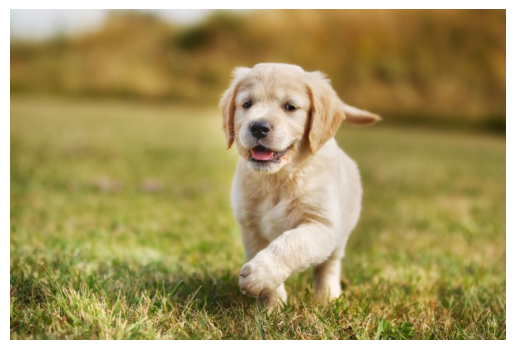

In [12]:
from PIL import Image

filename = './figure/golden.jpg'

img = Image.open(filename)

plt.imshow(img)
plt.grid(None)
plt.axis('off')
plt.show()

In [18]:
preprocessed = weights.transforms()
img_tensor = preprocessed(img)

print(img_tensor.shape)

torch.Size([3, 224, 224])


In [19]:
vit = vit.to(device)
vit.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [24]:
img = img_tensor.unsqueeze(0).to(device)

output = vit(img)
print(output.shape)
print(output)

torch.Size([1, 1000])
tensor([[-4.0856e-02, -3.9470e-01, -2.5251e-01, -5.8579e-02, -2.2014e-01,
          3.6763e-01,  1.4764e-01,  2.7590e-01,  6.4857e-02,  9.3074e-02,
         -8.3620e-02, -7.6975e-01,  1.6079e-02,  1.7975e-01, -4.5639e-01,
          1.8724e-01, -4.1771e-01, -4.9444e-01,  2.3549e-01, -3.8482e-01,
         -4.0222e-01, -8.4760e-02,  3.9503e-01,  3.1998e-01, -2.9413e-01,
         -6.2376e-02,  3.2688e-01, -2.4062e-02, -4.5923e-01,  3.6300e-02,
          1.8949e-01, -2.8726e-01,  1.8084e-01,  1.0628e-01,  1.0870e-02,
          1.4964e-03,  3.4300e-01,  3.0270e-02,  3.1897e-01, -1.8601e-01,
          1.3994e-01, -4.8695e-01,  5.1247e-02,  2.5887e-01, -8.8304e-02,
          2.7767e-01, -5.3826e-01,  4.9403e-01, -5.0820e-01, -2.4235e-01,
         -2.1769e-01, -5.6214e-03, -2.1377e-01, -5.1763e-01, -9.8149e-02,
         -3.8669e-02, -6.8502e-02,  7.7521e-02,  2.2835e-01, -8.0418e-01,
         -8.6375e-01,  6.8500e-02,  2.4460e-01,  1.9568e-01, -2.2640e-01,
          1.5129

In [27]:
idx = output.argmax(-1)
max_val = output.max()
print(idx)
print(max_val)

tensor([207], device='cuda:0')
tensor(9.6993, device='cuda:0', grad_fn=<MaxBackward1>)


In [31]:
weights.meta['categories'][idx]

'golden retriever'